In [8]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from tensorflow.keras import preprocessing

from tensorflow.keras.callbacks import ModelCheckpoint


In [10]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    'Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='training',
    target_size=(30, 30))


Found 5473 images belonging to 10 classes.


In [11]:
valid_generator = train_datagen.flow_from_directory(
    'Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='validation',
    target_size=(30, 30))

Found 1363 images belonging to 10 classes.


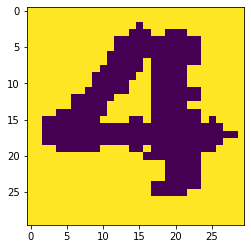

In [12]:
#Visualizando 
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]   
    plt.imshow(image[:,:,0])
    plt.show()

In [13]:
num_classes = 10

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


In [14]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(30,30,1), activation='relu')) #, data_format='channels_first'
#Camada de Pooling 	    
model.add(AveragePooling2D(pool_size=(2, 2)))
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))

#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))

#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())

print( model.output_shape)
model.add(Dense(512, activation='relu'))
print( model.output_shape)
model.add(Dense(128, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


(None, 128)
(None, 512)
(None, 128)
(None, 64)
(None, 10)


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit_generator(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        1600      
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 128)         0

C:\Users\felip\Anaconda3\envs\fiap_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 15s 219ms/step - loss: 1.3427 - accuracy: 0.5797 - val_loss: 0.2358 - val_accuracy: 0.9175

Epoch 00001: val_accuracy improved from -inf to 0.91750, saving model to model_best.h5
Epoch 2/10
27/27 [==============================] - 3s 102ms/step - loss: 0.2239 - accuracy: 0.9213 - val_loss: 0.0315 - val_accuracy: 0.9933

Epoch 00002: val_accuracy improved from 0.91750 to 0.99333, saving model to model_best.h5
Epoch 3/10
27/27 [==============================] - 3s 96ms/step - loss: 0.0866 - accuracy: 0.9731 - val_loss: 0.0356 - val_accuracy: 0.9908

Epoch 00003: val_accuracy did not improve from 0.99333
Epoch 4/10
27/27 [==============================] - 2s 86ms/step - loss: 0.0561 - accuracy: 0.9835 - val_loss: 0.0146 - val_accuracy: 0.9933 0s - loss: 0.0591 - accuracy: 0.98 - ETA: 0s - loss: 0.0588 - accuracy: 0.98 - ETA: 0s - loss: 0.0584 - accuracy: 

Epoch 00004: val_accuracy did not improve from 0.99333
Epoch 5/10
27/27 [=========

In [18]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    'Datasets/Digitos/Teste',
    batch_size=1,
    color_mode = 'grayscale',    
    target_size=(30, 30))

Found 74 images belonging to 10 classes.


In [19]:
scores = model.evaluate_generator(test_generator)   
print(scores)

C:\Users\felip\Anaconda3\envs\fiap_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0019264855654910207, 1.0]


In [20]:
predictions = model.predict_generator(test_generator)
print(predictions)

C:\Users\felip\Anaconda3\envs\fiap_tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[2.21049163e-07 3.10771986e-09 7.28849585e-08 1.46883699e-13
  1.52814011e-11 5.94383306e-15 1.96915728e-09 6.92032742e-08
  5.43962960e-06 9.99994159e-01]
 [2.54330780e-12 1.83870280e-11 9.99999881e-01 1.79297921e-09
  1.70474381e-11 8.46823514e-11 9.59021274e-13 1.42333903e-07
  1.07614048e-12 3.62409755e-11]
 [3.56637174e-05 9.98830736e-01 4.23344718e-05 5.34469837e-05
  2.31989354e-04 6.70394220e-04 8.31301804e-06 8.65587208e-05
  5.40129076e-06 3.51560702e-05]
 [1.74024166e-07 3.62618666e-05 1.91681981e-09 8.84092697e-06
  1.61304370e-09 9.99953270e-01 7.82252627e-08 7.55511394e-07
  6.01252282e-07 9.66110980e-13]
 [1.41036525e-08 4.97547272e-12 8.45915427e-09 1.16859133e-09
  8.80251871e-10 1.42815493e-09 6.90170268e-08 8.43469738e-09
  9.99999881e-01 3.43241666e-08]
 [2.77163639e-11 1.00000000e+00 6.56331673e-12 2.53674816e-12
  1.81492252e-11 5.13632088e-08 9.76661460e-13 1.22444492e-12
  8.81900889e-13 1.63224122e-11]
 [2.58747633e-07 7.29662771e-12 1.13379950e-09 1.63658566e

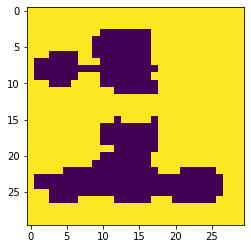

In [22]:
fileimg = r'D:\digito_1_Shift.png'

img = load_img(fileimg , color_mode = "grayscale", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0])
plt.show()

In [23]:
x = np.expand_dims(x, axis=0)

#
y_pred = model.predict(x)
y_prob = model.predict_proba(x)

res = np.argmax(y_pred)
print(res)


1


C:\Users\felip\Anaconda3\envs\fiap_tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
